<a href="https://colab.research.google.com/github/simsekergun/ENEE691/blob/main/week12/Kernels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# $\color{ForestGreen}{\text{Applications of Kernels}}$

In [ ]:
import numpy as np

def convolve_1d(image, kernel):
    ks = kernel.shape[0] 
    final_length = image.shape[0] - ks + 1
    return np.array([(image[i:i+ks]*kernel).sum() for i in range(final_length)])

def convolve_2d(image, kernel):
    ks = kernel.shape[1] 
    final_height = image.shape[1] - ks + 1
    return np.array([convolve_1d(image[:, i:i+ks], kernel) for i in range(final_height)]).T

In [ ]:
M = np.array([[4, -1, 2], [-2, 1, 7], [3, 5, 6]])  # Defining matrix M as an numpy array
K = np.array([[2, 1], [3, 5]])                     # Defining matrix K as an numpy array

convolve_2d(M, K)   # Computing the convolved matrix

array([[ 6, 38],
       [31, 54]])

In [ ]:
A = np.array([[1, 2, 2, 1, 3], 
              [2, 4, 6, 1, 3],
              [-3, 1, 4, 2, 4],
              [7, -2, -3, -1, 5],
              [2, 1, 5, 7, 1],
              [4, -2, 1, 2, 5]])

K = np.array([[1, -2, 1], [3, 2, -2]])

print('Size of A =', A.shape)
print('Size of K =', K.shape)
print('Size of A convolved by K =', convolve_2d(A, K).shape)

convolve_2d(A, K)

Size of A = (6, 5)
Size of K = (2, 3)
Size of A convolved by K = (5, 3)


array([[  1,  21,  17],
       [-15,   0,  15],
       [ 22, -15, -17],
       [  6,   2,  31],
       [ 11, -10, -11]])

In [ ]:
A = np.array([[0, 0, 0, 0, 0], [0, 4, -1, 2, 0], [0, -2, 1, 7, 0], [0, 3, 5, 6, 0], [0, 0, 0, 0, 0]])
K = np.array([[1, 0, 2], [1, -1, 3], [0, 2, 1]])

convolve_2d(A, K)

array([[-10,  20,  11],
       [ 14,  42,   5],
       [ 14,  28,   0]])

In [ ]:
import torch
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt

MNIST_train = torchvision.datasets.MNIST("./data", train=True, download=True, transform=transforms.ToTensor())
MNIST_test = torchvision.datasets.MNIST("./data", train=False, download=True, transform=transforms.ToTensor())

print('Size of MNIST train =', len(MNIST_train))
print('Size of MNIST test =', len(MNIST_test))

Size of MNIST train = 60000
Size of MNIST test = 10000


Tensor shape of the image = torch.Size([1, 28, 28])
Digit = 9


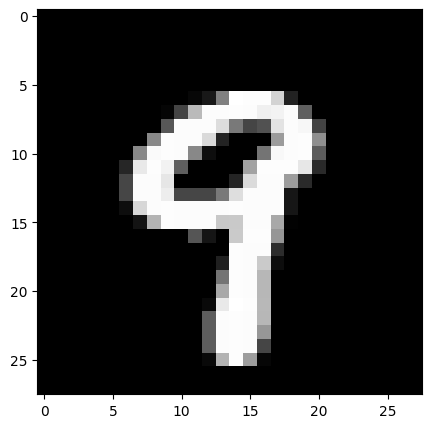

In [ ]:
img_num = 39532 

X_sample, y_sample = MNIST_train[img_num] 

plt.figure(figsize=(5, 5))
plt.imshow(X_sample[0,:], vmin=0, vmax=1, cmap='gray')
print('Tensor shape of the image =', X_sample.shape)
print('Digit =', y_sample)
plt.show()

Digit = 9


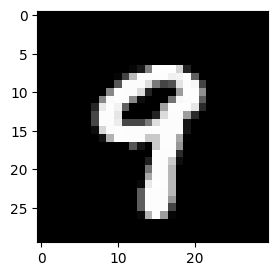

In [ ]:
def display_kernel_action(img_num, ker):
    
    import matplotlib.pyplot as plt
    from scipy.signal import convolve
    
    X_sample, y_sample = MNIST_train[img_num]    # Pick the image from MNIST
    print('Digit =', y_sample)                   # Display the label 
    conv_image = convolve(X_sample[0], ker)      # Convolve the (padded) image with the kernel 
    plt.figure(figsize=(3, 3))
    plt.imshow(conv_image, vmin=0, vmax=1, cmap='gray')  # Display the convolved image
    plt.show()
    return

kernel_0 = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])

display_kernel_action(img_num, kernel_0)

Digit = 9


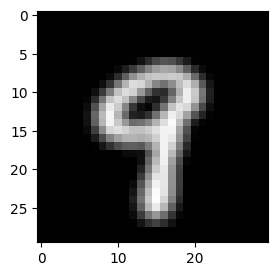

In [ ]:
kernel_1 = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])/9

display_kernel_action(img_num, kernel_1)

Digit = 9


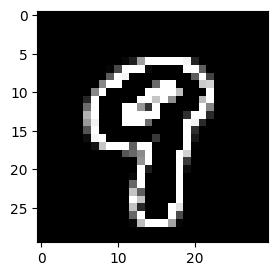

In [ ]:
kernel_2 = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]])

display_kernel_action(img_num, kernel_2)

Digit = 3


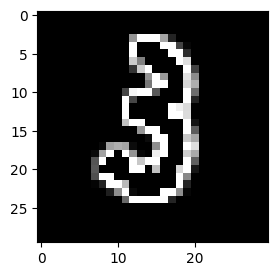

In [ ]:
kernel_2 = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]])

display_kernel_action(1234, kernel_2)

Digit = 9


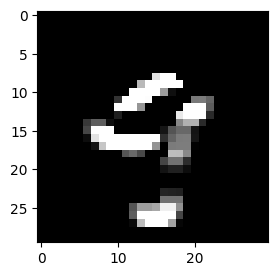

In [ ]:
kernel_3 = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

display_kernel_action(img_num, kernel_3)

Digit = 4


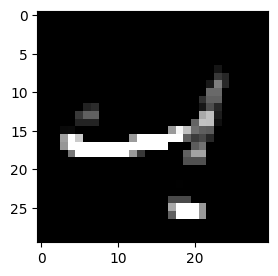

In [ ]:
kernel_3 = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

display_kernel_action(2, kernel_3)

Digit = 9


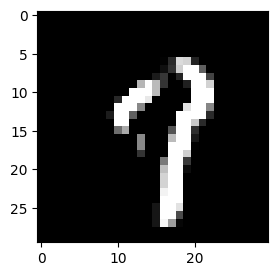

In [ ]:
kernel_4 = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])

display_kernel_action(img_num, kernel_4)

Digit = 9


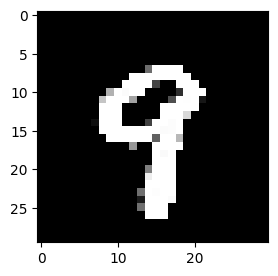

In [ ]:
kernel_5 = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

display_kernel_action(img_num, kernel_5)

Digit = 9


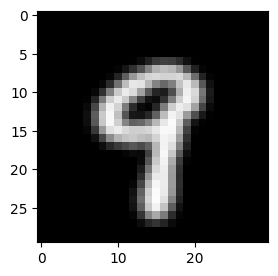

In [ ]:
kernel_6 = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])/16

display_kernel_action(img_num, kernel_6)